## Modec Problem Demo

We are getting the sensor data in 2 dimentions. "Front to Reverse" and "Left to Right". For the demo purpose we only need to solve the problem for one dimention. The second dimention would be solved by repeating the same steps.

1. Let us first plot the sensor data.

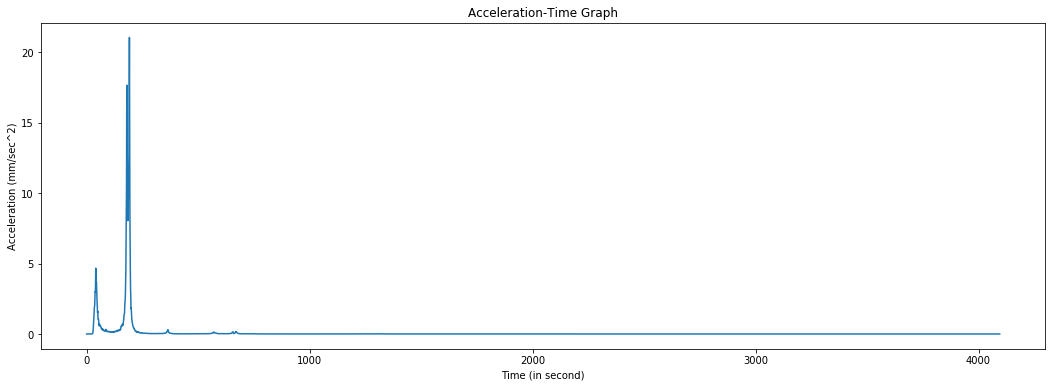

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, fftfreq, ifft

accelerometerReading=[0.000031,0.000075,0.000066,0.000069,0.000067,0.000072,0.000077,0.000089,0.000077,0.000087,0.000094,0.000104,0.000112,0.000123,0.000136,0.000158,0.000177,0.000199,0.000232,0.000282,0.000345,0.000413,0.000542,0.000816,0.001488,0.003688,0.013071,0.040865,0.105207,0.212276,0.416092,0.744791,1.028363,1.28647,1.577253,1.939403,1.9673,2.36121,2.984875,2.968135,3.40321,4.669731,3.740048,3.351166,3.702566,3.297685,2.763201,2.322197,1.813412,1.517358,1.606686,1.185035,1.039931,1.058911,0.976118,0.797183,0.592949,0.698949,0.719275,0.585431,0.569751,0.599422,0.563758,0.555477,0.49591,0.409266,0.396105,0.360335,0.398273,0.369427,0.335822,0.308504,0.274055,0.312914,0.332496,0.321285,0.31757,0.254541,0.215112,0.232816,0.228116,0.234584,0.21715,0.195188,0.215253,0.25833,0.273194,0.325267,0.285576,0.217001,0.20737,0.172692,0.170719,0.196906,0.179595,0.177829,0.171478,0.176256,0.147792,0.167202,0.172637,0.178603,0.174245,0.139767,0.137616,0.161608,0.167312,0.148364,0.161958,0.152551,0.15384,0.146514,0.119995,0.13747,0.153873,0.135751,0.145221,0.141273,0.124124,0.141302,0.175532,0.173985,0.155107,0.142999,0.1714,0.14797,0.144931,0.165191,0.172217,0.195346,0.192706,0.180284,0.182163,0.177977,0.218889,0.225616,0.247113,0.236975,0.212114,0.198496,0.217732,0.276616,0.25524,0.243848,0.241887,0.233758,0.277501,0.304819,0.267841,0.254757,0.307221,0.347244,0.315286,0.349604,0.504739,0.561136,0.54112,0.531232,0.557911,0.585212,0.687713,0.697317,0.601646,0.613288,0.763379,0.925171,0.993371,1.081011,1.38664,1.407797,1.47154,1.881199,2.315329,2.386885,2.858756,3.591836,4.540611,7.159954,8.626006,10.523218,16.620719,17.652373,13.569837,11.723031,9.905015,8.039445,9.076714,10.490857,9.651339,9.802259,12.632497,17.815059,21.038793,13.96097,9.242825,6.383717,4.612874,3.302949,2.744089,1.790106,1.841779,1.525541,1.215521,0.990982,0.861788,0.784405,0.693921,0.596339,0.545132,0.49413,0.488858,0.452216,0.417822,0.352615,0.367478,0.336159,0.31796,0.263331,0.20864,0.216129,0.233329,0.210499,0.16458,0.137606,0.160645,0.179695,0.160002,0.130053,0.140712,0.1528,0.121347,0.106521,0.121283,0.107699,0.123123,0.121353,0.108332,0.093488,0.075701,0.076998,0.075136,0.064313,0.071168,0.082974,0.085031,0.088757,0.091858,0.084449,0.064506,0.055876,0.043699,0.050963,0.057984,0.05582,0.05161,0.059834,0.064797,0.058705,0.057385,0.058271,0.051852,0.056452,0.045488,0.041669,0.050837,0.048249,0.039669,0.037599,0.045185,0.049119,0.0445,0.03647,0.040274,0.03869,0.033541,0.031781,0.039279,0.03656,0.040386,0.044446,0.03577,0.029791,0.030584,0.031018,0.028878,0.033474,0.037172,0.036262,0.034178,0.031135,0.025254,0.031056,0.030986,0.030599,0.029603,0.030478,0.030641,0.029423,0.027025,0.026817,0.029014,0.027778,0.029347,0.031374,0.031744,0.030617,0.033074,0.031948,0.032048,0.029044,0.02903,0.030439,0.026247,0.025987,0.032409,0.040505,0.037949,0.026945,0.027104,0.030573,0.029773,0.033507,0.037282,0.035502,0.030483,0.029518,0.028104,0.032716,0.037793,0.032482,0.035629,0.034596,0.03533,0.035791,0.035951,0.037085,0.035376,0.039481,0.042854,0.039239,0.038297,0.03377,0.031529,0.03397,0.036154,0.038457,0.045365,0.047074,0.050627,0.059169,0.06399,0.054416,0.052445,0.066748,0.071719,0.075386,0.078797,0.080668,0.093652,0.140341,0.167755,0.169977,0.198802,0.229419,0.302905,0.296493,0.286894,0.201773,0.118015,0.104008,0.095658,0.083686,0.068488,0.057775,0.054188,0.052461,0.048433,0.053299,0.047201,0.036827,0.034454,0.033928,0.035719,0.029742,0.026541,0.022081,0.020271,0.025626,0.026948,0.022994,0.023514,0.021511,0.018007,0.017503,0.02111,0.018411,0.01825,0.020089,0.022475,0.022054,0.018647,0.016857,0.01793,0.015064,0.014281,0.013346,0.013591,0.013147,0.012075,0.011632,0.011064,0.011085,0.010473,0.010953,0.012498,0.010123,0.010721,0.012406,0.011392,0.011065,0.012066,0.012333,0.011913,0.010119,0.009183,0.009411,0.009458,0.01008,0.008971,0.008902,0.009939,0.009619,0.008808,0.010592,0.011437,0.010512,0.010206,0.009321,0.009296,0.009708,0.009888,0.008172,0.007537,0.008427,0.007875,0.007999,0.007863,0.008895,0.008997,0.008651,0.008593,0.009769,0.009429,0.00867,0.008338,0.007275,0.008257,0.008996,0.009153,0.008734,0.008199,0.009146,0.008743,0.007397,0.007949,0.009253,0.009089,0.008494,0.00838,0.008258,0.006802,0.007113,0.007949,0.006893,0.006711,0.006787,0.006695,0.007768,0.006785,0.00733,0.007218,0.007851,0.00724,0.006967,0.006783,0.006701,0.00545,0.006243,0.00734,0.007777,0.009168,0.009288,0.008888,0.008294,0.00856,0.010378,0.008811,0.007915,0.009863,0.010657,0.009215,0.009386,0.009156,0.009087,0.009049,0.009432,0.010375,0.010082,0.008856,0.008759,0.008449,0.010451,0.011567,0.010727,0.011491,0.011801,0.008717,0.008181,0.010693,0.011104,0.010398,0.010353,0.011785,0.01031,0.011827,0.013908,0.012961,0.015098,0.015847,0.015581,0.014798,0.014273,0.014058,0.013046,0.013284,0.015213,0.015442,0.015431,0.016941,0.01767,0.016403,0.016517,0.0189,0.018987,0.016719,0.017034,0.019349,0.014945,0.012946,0.018843,0.021699,0.021864,0.024783,0.028384,0.030707,0.031641,0.032336,0.033808,0.036218,0.037319,0.039707,0.051648,0.063888,0.063345,0.061957,0.057186,0.061085,0.073426,0.100898,0.132323,0.139707,0.130232,0.105206,0.076097,0.076675,0.071626,0.082617,0.079777,0.0784,0.082843,0.070164,0.054105,0.050353,0.042865,0.040091,0.039558,0.038457,0.035799,0.028613,0.027649,0.029306,0.02497,0.023133,0.023964,0.022004,0.018487,0.021929,0.021394,0.022148,0.022255,0.024941,0.0263,0.028864,0.026762,0.021768,0.019315,0.02128,0.021532,0.021209,0.020587,0.014763,0.015628,0.019997,0.019056,0.017428,0.017896,0.015129,0.013284,0.016379,0.021015,0.018344,0.015533,0.018024,0.022111,0.022399,0.019081,0.018865,0.01881,0.017436,0.018727,0.020162,0.018365,0.019107,0.021869,0.02038,0.020531,0.022333,0.022741,0.022797,0.027461,0.028059,0.027397,0.031124,0.03258,0.031701,0.036055,0.039654,0.040414,0.039887,0.041527,0.052244,0.070472,0.085064,0.100997,0.128016,0.154894,0.156787,0.119111,0.065585,0.036672,0.027153,0.025826,0.034165,0.047653,0.053399,0.059211,0.074176,0.108682,0.151582,0.166166,0.133691,0.154456,0.139075,0.102493,0.087943,0.083723,0.072759,0.05951,0.049118,0.038913,0.034593,0.034794,0.033623,0.025058,0.026679,0.025009,0.020226,0.018425,0.017543,0.016155,0.017626,0.018264,0.016355,0.015738,0.015325,0.013997,0.012391,0.01295,0.013285,0.016709,0.01586,0.014503,0.014417,0.011553,0.01228,0.011923,0.011645,0.014823,0.016128,0.013956,0.013479,0.015245,0.013208,0.01074,0.012833,0.013653,0.013571,0.014068,0.013244,0.011559,0.010596,0.012896,0.016355,0.017558,0.014863,0.01391,0.013523,0.01116,0.00999,0.010949,0.012607,0.011111,0.012397,0.012619,0.011853,0.010614,0.010117,0.009854,0.008913,0.008992,0.009515,0.008035,0.007586,0.005928,0.005284,0.005201,0.005433,0.007406,0.009583,0.014246,0.015427,0.013177,0.013998,0.01724,0.019902,0.018928,0.017324,0.014577,0.011261,0.010493,0.008603,0.00749,0.006921,0.005195,0.005121,0.004946,0.00381,0.003032,0.002875,0.002722,0.002603,0.002919,0.002738,0.003298,0.003447,0.003072,0.003133,0.003475,0.003798,0.003776,0.004022,0.00416,0.003947,0.003635,0.004017,0.003906,0.003395,0.003124,0.003275,0.002982,0.002865,0.003324,0.003285,0.003184,0.002773,0.002962,0.003209,0.002974,0.002763,0.002734,0.002316,0.002115,0.002521,0.002539,0.002683,0.002848,0.002993,0.003181,0.002732,0.002824,0.003114,0.002754,0.002533,0.002694,0.002608,0.002373,0.002875,0.002994,0.003192,0.003066,0.002582,0.002497,0.002516,0.002355,0.002193,0.002464,0.002408,0.002143,0.002071,0.002107,0.002081,0.001706,0.001733,0.002101,0.00209,0.001724,0.001748,0.001866,0.001677,0.001424,0.001642,0.001788,0.002042,0.001799,0.001658,0.001812,0.001964,0.001999,0.001824,0.001645,0.001702,0.001661,0.001696,0.001767,0.001922,0.001966,0.002006,0.001742,0.00199,0.001974,0.002216,0.002189,0.002252,0.002359,0.003024,0.003072,0.003337,0.003517,0.002849,0.001908,0.001517,0.001384,0.001369,0.001671,0.001586,0.001502,0.001611,0.001744,0.001582,0.002048,0.002033,0.001884,0.002037,0.001987,0.001922,0.001858,0.00202,0.002216,0.002348,0.001897,0.001928,0.002069,0.00215,0.001938,0.00194,0.00195,0.001984,0.002412,0.002021,0.001935,0.001937,0.001887,0.00205,0.002289,0.002229,0.002012,0.00188,0.002102,0.00231,0.002386,0.002448,0.002355,0.002061,0.002132,0.002382,0.002527,0.002291,0.002163,0.00275,0.003014,0.002844,0.002696,0.002721,0.002754,0.002781,0.002808,0.002853,0.003063,0.003013,0.002893,0.002749,0.00246,0.002179,0.001738,0.001493,0.001517,0.001528,0.001603,0.001399,0.001336,0.00121,0.001285,0.001402,0.001301,0.00136,0.001506,0.001637,0.001733,0.001796,0.001927,0.002092,0.002308,0.002481,0.002561,0.002603,0.002598,0.002571,0.002873,0.002876,0.002748,0.002965,0.002772,0.002443,0.002014,0.001685,0.00155,0.001761,0.001568,0.001552,0.00139,0.001177,0.001056,0.001145,0.001263,0.001077,0.000997,0.000978,0.000863,0.000917,0.00094,0.000936,0.001048,0.001104,0.001156,0.001068,0.000911,0.000924,0.000941,0.000847,0.000823,0.000809,0.000818,0.000756,0.000808,0.000889,0.000921,0.001144,0.001308,0.001481,0.002247,0.002536,0.002479,0.002318,0.001911,0.001948,0.002164,0.002019,0.001975,0.001761,0.00187,0.001872,0.001922,0.001718,0.001799,0.002174,0.002366,0.002496,0.002234,0.002124,0.002061,0.002101,0.00198,0.002188,0.002303,0.002227,0.00221,0.002248,0.002112,0.002036,0.002352,0.00243,0.002363,0.002592,0.002732,0.002443,0.002055,0.001799,0.002013,0.002187,0.002009,0.002017,0.002428,0.002359,0.002018,0.001911,0.001772,0.001836,0.001828,0.001806,0.001863,0.002015,0.00206,0.00202,0.002258,0.002292,0.002285,0.0026,0.00286,0.002617,0.00249,0.002388,0.002544,0.003037,0.003361,0.003551,0.004001,0.00401,0.003661,0.003544,0.003903,0.004099,0.004852,0.004984,0.005077,0.005346,0.004951,0.005118,0.005098,0.00458,0.003934,0.004193,0.003885,0.00325,0.002952,0.002445,0.002432,0.002413,0.002402,0.002418,0.002245,0.001952,0.001668,0.001674,0.001644,0.001678,0.001578,0.001505,0.001421,0.001312,0.001415,0.001318,0.001252,0.001182,0.0011,0.001234,0.001403,0.001373,0.001284,0.001111,0.001123,0.001161,0.001389,0.001299,0.00126,0.001235,0.001117,0.001111,0.001179,0.001237,0.001183,0.001092,0.001091,0.001114,0.001031,0.00094,0.00092,0.000873,0.000979,0.001109,0.001083,0.001009,0.001039,0.000931,0.000865,0.000967,0.001036,0.001062,0.001128,0.001081,0.000963,0.000906,0.000933,0.000936,0.000956,0.000906,0.000969,0.001028,0.000958,0.000961,0.001081,0.00112,0.001028,0.001013,0.000866,0.00077,0.000716,0.000627,0.000789,0.000908,0.000792,0.000799,0.000771,0.000776,0.000826,0.000756,0.000702,0.000606,0.000564,0.000514,0.000623,0.000688,0.000661,0.000521,0.000529,0.00062,0.000611,0.000563,0.000525,0.000602,0.00058,0.000598,0.000633,0.000626,0.000701,0.000774,0.000875,0.00088,0.00087,0.000824,0.000797,0.000841,0.000849,0.000831,0.000974,0.001069,0.000979,0.000993,0.001023,0.001022,0.001148,0.001165,0.001224,0.001161,0.001246,0.001124,0.001159,0.001177,0.001074,0.001163,0.001383,0.001415,0.001576,0.001691,0.001568,0.001511,0.00145,0.001555,0.001877,0.002005,0.001993,0.001901,0.00208,0.00221,0.002233,0.002446,0.002594,0.002623,0.002651,0.002514,0.002317,0.002505,0.002737,0.002934,0.003174,0.003198,0.002966,0.002706,0.00259,0.002425,0.002302,0.002158,0.002142,0.002133,0.002022,0.001678,0.001576,0.001488,0.001392,0.001548,0.001505,0.001328,0.001214,0.001221,0.001201,0.001217,0.001309,0.001266,0.001302,0.001185,0.001059,0.001214,0.0011,0.001073,0.001035,0.001006,0.001219,0.001268,0.001207,0.001132,0.001199,0.001318,0.001369,0.001404,0.001374,0.001332,0.001509,0.001738,0.00188,0.001718,0.001351,0.001591,0.001924,0.002032,0.002069,0.002274,0.002392,0.002404,0.002366,0.002284,0.002676,0.003039,0.003163,0.00299,0.002804,0.002792,0.003097,0.003858,0.003894,0.004535,0.004508,0.003676,0.003634,0.003821,0.004144,0.004946,0.005577,0.00566,0.005678,0.005737,0.006826,0.006458,0.00569,0.006113,0.007761,0.008624,0.007125,0.006893,0.00737,0.008898,0.009619,0.009733,0.010697,0.010259,0.011405,0.010622,0.009303,0.009662,0.008311,0.007091,0.006079,0.005281,0.004591,0.003573,0.003676,0.003787,0.003824,0.003574,0.003234,0.002453,0.00247,0.003113,0.002775,0.002191,0.002096,0.002337,0.002547,0.002037,0.001575,0.001478,0.001634,0.001752,0.001953,0.00227,0.00195,0.001779,0.00147,0.00153,0.001333,0.001297,0.001198,0.001322,0.001461,0.001328,0.001383,0.001386,0.00125,0.001422,0.001196,0.001082,0.001181,0.001158,0.001038,0.00112,0.00118,0.00118,0.001138,0.001233,0.001222,0.001204,0.00117,0.000961,0.000933,0.001023,0.001001,0.000824,0.000757,0.000766,0.000726,0.000655,0.000705,0.000757,0.000772,0.000719,0.000644,0.000631,0.000662,0.000661,0.000582,0.000478,0.000521,0.000509,0.000573,0.000581,0.000552,0.000656,0.000587,0.000504,0.000522,0.000489,0.000449,0.000431,0.000507,0.000461,0.000426,0.000438,0.000365,0.000463,0.000452,0.000444,0.000471,0.000425,0.000442,0.000371,0.000433,0.000481,0.000423,0.00043,0.000429,0.000419,0.000416,0.0004,0.000432,0.000452,0.000395,0.000354,0.000364,0.000357,0.000277,0.0003,0.000301,0.000336,0.00034,0.00038,0.000365,0.000274,0.000322,0.000375,0.000351,0.000325,0.000351,0.000328,0.0003,0.000286,0.00031,0.000313,0.000341,0.000284,0.000352,0.000347,0.000342,0.000335,0.000305,0.000308,0.00026,0.000278,0.000327,0.000375,0.0003,0.000292,0.000351,0.000326,0.000355,0.00042,0.00043,0.000309,0.000285,0.000321,0.000314,0.000279,0.000342,0.00037,0.000297,0.000325,0.000331,0.000332,0.000422,0.000429,0.000354,0.000299,0.000295,0.000303,0.000291,0.000326,0.000314,0.000279,0.00032,0.000325,0.000319,0.000289,0.000319,0.000309,0.000306,0.000269,0.00024,0.000269,0.000278,0.000245,0.000283,0.000282,0.000255,0.000281,0.000308,0.000313,0.00033,0.000288,0.000265,0.000287,0.000307,0.000328,0.000304,0.00028,0.000266,0.000244,0.000263,0.000273,0.000272,0.000282,0.000274,0.000392,0.000498,0.000475,0.000412,0.000404,0.000421,0.000498,0.000452,0.000433,0.000465,0.000562,0.000488,0.000485,0.000516,0.000442,0.000406,0.000406,0.000387,0.000335,0.000288,0.000297,0.000265,0.000289,0.000239,0.000278,0.000255,0.000277,0.000279,0.000268,0.000252,0.000273,0.000265,0.000261,0.000213,0.000217,0.000211,0.000187,0.000218,0.00022,0.000228,0.000238,0.000257,0.000249,0.000226,0.000224,0.000202,0.000197,0.000207,0.000225,0.000221,0.000189,0.000181,0.000209,0.000182,0.000186,0.000214,0.000186,0.000179,0.000152,0.000181,0.000187,0.000161,0.000155,0.000155,0.000135,0.000142,0.000171,0.000155,0.000175,0.000186,0.000154,0.000132,0.000163,0.000154,0.00016,0.000183,0.000199,0.000192,0.00018,0.00016,0.000182,0.000172,0.000167,0.000203,0.000214,0.000228,0.000205,0.000185,0.000196,0.000185,0.000181,0.000171,0.000165,0.000159,0.00019,0.000191,0.000176,0.000167,0.000174,0.000167,0.00018,0.000153,0.000128,0.000121,0.000153,0.000168,0.000143,0.000137,0.000113,0.000129,0.000145,0.000137,0.000139,0.000149,0.00017,0.000153,0.000157,0.000144,0.000123,0.000146,0.00015,0.000161,0.000161,0.000157,0.000158,0.000161,0.000167,0.000159,0.000163,0.000181,0.000179,0.000146,0.000142,0.000134,0.000129,0.000148,0.00016,0.000142,0.000157,0.000144,0.00013,0.000131,0.000128,0.000132,0.000135,0.000137,0.000162,0.000159,0.000168,0.000189,0.000179,0.000161,0.00017,0.000161,0.000183,0.000198,0.0002,0.000199,0.000166,0.000198,0.000182,0.000154,0.000188,0.000168,0.000131,0.000133,0.000194,0.000166,0.000138,0.000124,0.000152,0.000156,0.000144,0.000143,0.000148,0.000126,0.000141,0.000133,0.000132,0.000146,0.000153,0.000142,0.000161,0.000145,0.000134,0.00013,0.000141,0.000159,0.000157,0.000134,0.000126,0.000117,0.000142,0.000155,0.000166,0.000166,0.000147,0.000151,0.000176,0.000162,0.00016,0.000204,0.000214,0.000205,0.000209,0.000196,0.000147,0.00014,0.000149,0.000172,0.000193,0.000189,0.000167,0.000171,0.000219,0.000238,0.000197,0.000182,0.000182,0.000195,0.000228,0.00019,0.000172,0.000158,0.000162,0.000145,0.000154,0.000174,0.000169,0.000143,0.000141,0.000166,0.000153,0.000145,0.000138,0.000164,0.000175,0.000172,0.000171,0.000187,0.00017,0.000171,0.000172,0.000185,0.000156,0.000169,0.000181,0.000166,0.000158,0.000139,0.000148,0.000145,0.000138,0.000124,0.000132,0.000133,0.000153,0.000147,0.000146,0.000147,0.000142,0.000145,0.000151,0.00016,0.000147,0.000155,0.000179,0.000153,0.000141,0.000161,0.00018,0.000172,0.000183,0.000156,0.000161,0.000166,0.000173,0.000149,0.000167,0.000182,0.000169,0.000143,0.000147,0.00013,0.000143,0.000195,0.000201,0.000164,0.000195,0.000203,0.000248,0.000215,0.000203,0.000236,0.000229,0.000211,0.000185,0.000186,0.000196,0.000181,0.000199,0.000192,0.000209,0.000243,0.000221,0.0002,0.000196,0.000192,0.000202,0.000245,0.000222,0.00019,0.000209,0.00028,0.000279,0.000256,0.000279,0.000335,0.000283,0.000269,0.000362,0.000368,0.000359,0.000408,0.0004,0.000416,0.000441,0.000395,0.000384,0.000395,0.000372,0.000512,0.000517,0.000424,0.000391,0.000446,0.000509,0.000465,0.000466,0.000526,0.000461,0.000463,0.000494,0.000543,0.000556,0.000519,0.000551,0.000512,0.000408,0.000342,0.000328,0.000342,0.000359,0.000308,0.000325,0.000287,0.000257,0.000253,0.00026,0.000244,0.000231,0.000311,0.000319,0.000276,0.00023,0.000259,0.00027,0.000253,0.000274,0.000266,0.000262,0.000257,0.000271,0.000362,0.000333,0.000342,0.000357,0.000397,0.000353,0.000322,0.00037,0.00036,0.000368,0.00034,0.000344,0.000314,0.000281,0.000274,0.000285,0.000227,0.000224,0.00026,0.00031,0.000317,0.000271,0.000262,0.000246,0.000233,0.000217,0.000196,0.000204,0.000212,0.000232,0.00027,0.000241,0.000197,0.000185,0.000179,0.000239,0.000236,0.000229,0.000226,0.000197,0.000222,0.000234,0.000256,0.000269,0.000251,0.000296,0.000322,0.000314,0.0003,0.000291,0.000275,0.00028,0.000275,0.000331,0.000321,0.000248,0.000303,0.00034,0.000341,0.000317,0.000366,0.00045,0.000362,0.000411,0.000424,0.000429,0.000385,0.000415,0.000496,0.000619,0.000614,0.000505,0.000478,0.000599,0.000627,0.000603,0.000666,0.000725,0.000711,0.000764,0.001092,0.000964,0.000868,0.0008,0.000755,0.000748,0.000667,0.000646,0.00074,0.000837,0.000813,0.000804,0.000665,0.000615,0.000601,0.000531,0.0006,0.000663,0.000658,0.000621,0.000488,0.000433,0.000431,0.000427,0.000401,0.000446,0.000462,0.00042,0.000426,0.000403,0.000332,0.000316,0.000299,0.000338,0.00035,0.000304,0.000306,0.000285,0.000308,0.000256,0.000221,0.000232,0.00021,0.000244,0.000254,0.000246,0.000259,0.000249,0.000244,0.000257,0.000249,0.000208,0.000213,0.000203,0.000184,0.000179,0.000209,0.000188,0.000166,0.000165,0.000173,0.000162,0.000142,0.000143,0.000161,0.000158,0.000163,0.000152,0.000151,0.000161,0.000151,0.000132,0.000136,0.000156,0.000171,0.000172,0.000151,0.000131,0.00014,0.000142,0.000152,0.000115,0.00012,0.000127,0.000117,0.000145,0.000142,0.000125,0.000125,0.000105,0.000131,0.000136,0.000129,0.000121,0.000103,0.000104,0.000116,0.000106,0.000106,0.00011,0.000098,0.000119,0.000125,0.000108,0.000108,0.000105,0.00011,0.000128,0.000123,0.000113,0.000112,0.000098,0.000106,0.000113,0.000095,0.00013,0.000139,0.000118,0.000119,0.000098,0.0001,0.000109,0.000106,0.000113,0.00011,0.0001,0.000098,0.000096,0.000107,0.000106,0.000111,0.000107,0.0001,0.000103,0.0001,0.000094,0.000107,0.000114,0.000115,0.000108,0.000083,0.000094,0.000116,0.000134,0.000125,0.000119,0.000119,0.000118,0.000115,0.000096,0.000089,0.000097,0.000122,0.000124,0.000136,0.000143,0.000115,0.000105,0.000097,0.000105,0.00011,0.000112,0.000118,0.000112,0.000106,0.000115,0.000102,0.000098,0.000094,0.000093,0.000113,0.000123,0.000119,0.000121,0.000101,0.0001,0.000114,0.000118,0.00012,0.000108,0.00009,0.000099,0.000101,0.000092,0.000086,0.000094,0.000091,0.000075,0.00007,0.000081,0.000076,0.000072,0.000089,0.000091,0.000085,0.000092,0.000093,0.000083,0.00008,0.000078,0.000076,0.00008,0.000084,0.000074,0.00007,0.000072,0.000078,0.000069,0.000062,0.000058,0.000055,0.000055,0.000068,0.000069,0.000072,0.000073,0.000077,0.000079,0.000082,0.000083,0.000063,0.000059,0.000061,0.000061,0.000061,0.000058,0.000061,0.000065,0.000074,0.000068,0.000067,0.000071,0.00007,0.000075,0.00008,0.000071,0.000073,0.000072,0.000075,0.000078,0.000076,0.000087,0.000077,0.00008,0.000076,0.000081,0.000079,0.000073,0.000072,0.000062,0.000067,0.000072,0.00006,0.000057,0.000063,0.000067,0.000068,0.000074,0.000071,0.000061,0.000071,0.000084,0.000085,0.000066,0.000065,0.000078,0.000067,0.000057,0.000056,0.000066,0.000069,0.000074,0.000071,0.000071,0.000068,0.00006,0.000072,0.000077,0.000072,0.000067,0.000069,0.000069,0.000061,0.000064,0.00007,0.000072,0.000076,0.000082,0.000085,0.000084,0.000061,0.000058,0.000067,0.000072,0.000083,0.000091,0.00009,0.000104,0.000094,0.000089,0.000111,0.000113,0.000087,0.000087,0.000093,0.000098,0.000092,0.000097,0.000092,0.000087,0.00008,0.000071,0.00008,0.000079,0.000072,0.000061,0.000076,0.000077,0.000067,0.000079,0.000072,0.000063,0.000072,0.000071,0.000066,0.000061,0.000067,0.000076,0.000066,0.000055,0.000051,0.000064,0.000065,0.000063,0.00006,0.000058,0.000056,0.000062,0.000061,0.000062,0.000061,0.000066,0.000065,0.00007,0.00007,0.000063,0.000059,0.000077,0.00007,0.000071,0.000068,0.000072,0.000061,0.00005,0.000051,0.000057,0.000065,0.000059,0.000059,0.000066,0.000064,0.000062,0.000072,0.00007,0.000063,0.000056,0.000059,0.000059,0.000056,0.000047,0.000045,0.000054,0.000061,0.000066,0.000067,0.000065,0.000064,0.000053,0.000064,0.000065,0.000066,0.000075,0.00007,0.000074,0.000074,0.000071,0.000055,0.000052,0.000059,0.000058,0.000056,0.000058,0.00006,0.000061,0.000064,0.000063,0.000057,0.000057,0.000059,0.000065,0.000071,0.000065,0.000071,0.000071,0.000062,0.000063,0.000061,0.000064,0.000073,0.000084,0.000074,0.000071,0.000073,0.000072,0.00006,0.000062,0.000073,0.000076,0.000075,0.000066,0.000064,0.00007,0.000079,0.000073,0.00006,0.00007,0.000081,0.000082,0.00008,0.000077,0.000077,0.000079,0.000068,0.000063,0.000072,0.000085,0.000077,0.000083,0.000085,0.000083,0.000078,0.000068,0.00007,0.000082,0.000083,0.000083,0.000076,0.000082,0.000071,0.000077,0.000085,0.000086,0.000091,0.000091,0.000097,0.000094,0.000096,0.000096,0.000081,0.00007,0.000094,0.00011,0.000113,0.000117,0.000107,0.000102,0.000097,0.000102,0.000097,0.000104,0.000117,0.000102,0.000087,0.000087,0.000101,0.000111,0.000116,0.000123,0.000126,0.000134,0.000152,0.00013,0.000118,0.000136,0.000129,0.000119,0.000113,0.000135,0.000123,0.000136,0.000151,0.000141,0.000166,0.000197,0.000194,0.000179,0.000172,0.000177,0.000146,0.000173,0.000213,0.000157,0.000127,0.000155,0.000181,0.00018,0.000189,0.000162,0.000168,0.000178,0.00017,0.000191,0.000192,0.000184,0.000155,0.000137,0.00015,0.000168,0.000174,0.000193,0.00019,0.000171,0.000204,0.000239,0.00025,0.000217,0.00019,0.000231,0.00023,0.000247,0.000264,0.000281,0.000238,0.000224,0.000269,0.000254,0.00028,0.000234,0.00025,0.000235,0.0002,0.000198,0.000225,0.000199,0.00015,0.000134,0.000147,0.000169,0.000129,0.000128,0.000135,0.000121,0.000116,0.000123,0.000118,0.000114,0.000111,0.000104,0.000084,0.000092,0.000097,0.000093,0.000086,0.000096,0.000105,0.000098,0.000093,0.000088,0.000091,0.000096,0.000085,0.000089,0.00008,0.000071,0.000066,0.000069,0.000077,0.000092,0.000082,0.000072,0.000077,0.00008,0.000071,0.000068,0.00007,0.000064,0.000064,0.000065,0.000066,0.000069,0.000056,0.000047,0.000059,0.000069,0.000075,0.000073,0.000078,0.000075,0.000067,0.000064,0.000073,0.000065,0.000055,0.000062,0.000073,0.000063,0.000056,0.00006,0.00006,0.000063,0.000058,0.000062,0.000065,0.000072,0.000071,0.000068,0.000066,0.000068,0.000057,0.00006,0.000066,0.000071,0.000063,0.00006,0.000061,0.000066,0.000061,0.000054,0.000051,0.000057,0.000057,0.000055,0.000052,0.000058,0.000054,0.000046,0.000041,0.000051,0.000059,0.000058,0.000051,0.000053,0.000072,0.00007,0.000072,0.000072,0.00007,0.000068,0.000056,0.000058,0.00006,0.000056,0.000064,0.00006,0.000054,0.000062,0.000058,0.000053,0.000059,0.000063,0.000062,0.000058,0.000056,0.000057,0.000063,0.000061,0.000053,0.000055,0.000052,0.000061,0.000073,0.000062,0.000059,0.00007,0.00007,0.000052,0.00005,0.000066,0.000058,0.000063,0.000061,0.000049,0.000056,0.000066,0.000066,0.000072,0.000062,0.000056,0.000058,0.000056,0.000055,0.000056,0.000063,0.000066,0.000066,0.000059,0.000049,0.000047,0.000056,0.000057,0.00006,0.000061,0.000059,0.000052,0.00005,0.000055,0.000071,0.000065,0.000055,0.000062,0.000064,0.000055,0.000055,0.000068,0.000065,0.000056,0.000058,0.000071,0.000077,0.000066,0.00005,0.000057,0.00006,0.000064,0.000062,0.000071,0.000067,0.000058,0.000058,0.000062,0.000059,0.000068,0.000072,0.000061,0.000053,0.000046,0.000053,0.000061,0.000073,0.000078,0.000061,0.000054,0.000067,0.000079,0.00007,0.000063,0.000068,0.000086,0.000087,0.000079,0.000062,0.000062,0.000079,0.000069,0.000056,0.000059,0.000075,0.000082,0.000084,0.000077,0.000075,0.000087,0.000085,0.000079,0.000078,0.000082,0.000083,0.000079,0.000082,0.000073,0.000084,0.000077,0.000082,0.000094,0.000108,0.000113,0.000102,0.00009,0.000101,0.000102,0.000106,0.000088,0.000085,0.000111,0.000102,0.000097,0.000103,0.000106,0.0001,0.000095,0.000096,0.000118,0.000146,0.000137,0.000112,0.000114,0.000126,0.000106,0.000118,0.000116,0.000127,0.000106,0.000094,0.000118,0.000113,0.000102,0.000106,0.000138,0.000134,0.000118,0.000138,0.000159,0.000154,0.00013,0.000143,0.000149,0.000135,0.000153,0.00016,0.000139,0.000142,0.000137,0.00014,0.000153,0.000124,0.000113,0.000111,0.000117,0.000115,0.000121,0.000147,0.000167,0.000176,0.000161,0.000163,0.000151,0.000152,0.00015,0.000123,0.000136,0.000154,0.000129,0.000141,0.000131,0.000125,0.00012,0.000123,0.00014,0.000133,0.000135,0.000115,0.000106,0.000109,0.000115,0.000114,0.000115,0.000121,0.000103,0.000083,0.000097,0.000091,0.00009,0.000098,0.000104,0.000099,0.00009,0.00011,0.000114,0.000106,0.000105,0.000093,0.00009,0.000102,0.000106,0.000094,0.000094,0.000093,0.000089,0.000091,0.000094,0.000088,0.000075,0.000061,0.00008,0.000099,0.000091,0.000086,0.000084,0.00008,0.000074,0.000081,0.000084,0.000082,0.000093,0.000089,0.000083,0.00008,0.000074,0.000066,0.000089,0.000098,0.000084,0.000081,0.000061,0.000061,0.000067,0.000064,0.000078,0.00008,0.000078,0.000089,0.000082,0.000073,0.000089,0.000097,0.000078,0.000071,0.000074,0.000085,0.000094,0.00008,0.000074,0.000079,0.000074,0.000065,0.000068,0.000076,0.000073,0.000067,0.000075,0.000081,0.000075,0.000067,0.000076,0.000075,0.000074,0.000086,0.000085,0.000073,0.000078,0.000067,0.000066,0.00007,0.000071,0.000077,0.000078,0.000075,0.000064,0.000065,0.00007,0.000079,0.00007,0.000081,0.000083,0.00008,0.000064,0.000069,0.00008,0.000063,0.000062,0.000068,0.000074,0.000067,0.000069,0.000065,0.000077,0.00008,0.000087,0.000091,0.000089,0.000091,0.000095,0.000082,0.000078,0.000095,0.000098,0.000087,0.000093,0.00009,0.000106,0.000097,0.000096,0.000103,0.000093,0.0001,0.000099,0.000087,0.00008,0.000078,0.000099,0.000113,0.000096,0.000094,0.000087,0.000078,0.000088,0.000106,0.000096,0.000072,0.000076,0.00009,0.000122,0.000106,0.000091,0.000095,0.000103,0.000102,0.00011,0.000114,0.000119,0.000104,0.000095,0.000092,0.000088,0.000088,0.000096,0.000115,0.000103,0.000101,0.000091,0.000083,0.000093,0.000086,0.000086,0.000098,0.000093,0.000088,0.000084,0.000086,0.000071,0.000076,0.000091,0.000097,0.000082,0.000072,0.000078,0.000089,0.000068,0.000063,0.000076,0.000085,0.000079,0.000067,0.00008,0.000085,0.000088,0.000087,0.000075,0.000079,0.000075,0.000064,0.000059,0.000056,0.000061,0.000068,0.000062,0.000057,0.000055,0.00006,0.000067,0.000066,0.000064,0.000076,0.000064,0.000059,0.000062,0.000066,0.000072,0.000075,0.000078,0.000067,0.000064,0.000072,0.000074,0.000074,0.000072,0.000064,0.000057,0.00006,0.000067,0.000067,0.000079,0.000065,0.000066,0.000071,0.000053,0.000057,0.000063,0.000072,0.000059,0.000058,0.00006,0.000059,0.000054,0.000055,0.000051,0.000046,0.000047,0.000061,0.000065,0.000055,0.000056,0.000051,0.000049,0.000049,0.000059,0.000072,0.00007,0.000065,0.00006,0.000054,0.000049,0.000053,0.000055,0.000048,0.000052,0.000053,0.000054,0.000054,0.000058,0.000059,0.000039,0.000055,0.000063,0.000064,0.000062,0.000058,0.000054,0.000056,0.000054,0.000067,0.000065,0.000063,0.000056,0.000064,0.000059,0.000051,0.000057,0.00006,0.000059,0.000064,0.00006,0.00006,0.000062,0.000048,0.000057,0.000059,0.000063,0.000057,0.000048,0.000051,0.000059,0.000065,0.000054,0.000059,0.000057,0.000059,0.000058,0.000061,0.000061,0.000056,0.000051,0.000052,0.000054,0.000051,0.00005,0.000048,0.000046,0.000047,0.000051,0.000054,0.000048,0.000051,0.000052,0.000046,0.000049,0.000048,0.000049,0.000043,0.000044,0.000043,0.000042,0.000042,0.000049,0.00005,0.000049,0.000051,0.000049,0.00005,0.000046,0.000046,0.000049,0.000052,0.000049,0.000043,0.000046,0.000048,0.000043,0.000044,0.000053,0.000058,0.000045,0.000044,0.000047,0.000049,0.000051,0.000044,0.00004,0.000043,0.000052,0.000055,0.00005,0.000046,0.000048,0.000058,0.000049,0.000042,0.000043,0.000044,0.000038,0.000042,0.000045,0.00004,0.000047,0.000046,0.00004,0.000042,0.000043,0.000042,0.00004,0.000037,0.000036,0.000039,0.000045,0.000045,0.000047,0.000041,0.000046,0.000046,0.000041,0.000044,0.000042,0.000039,0.000044,0.000049,0.000055,0.000042,0.000041,0.000036,0.000043,0.000045,0.000041,0.000042,0.000046,0.00005,0.000049,0.000044,0.000033,0.000041,0.000046,0.000047,0.000042,0.000043,0.000047,0.000045,0.000047,0.000047,0.000046,0.000037,0.000036,0.000037,0.000041,0.000046,0.000051,0.000049,0.000041,0.000036,0.000039,0.000039,0.000037,0.000042,0.00004,0.000047,0.000039,0.000038,0.000046,0.000046,0.000037,0.000032,0.000034,0.000043,0.000049,0.000046,0.00004,0.000041,0.000047,0.00004,0.000042,0.000039,0.000042,0.000039,0.000044,0.000041,0.000037,0.000037,0.000038,0.000046,0.000041,0.000038,0.000038,0.000043,0.000038,0.000037,0.000032,0.000039,0.000044,0.000044,0.00004,0.000037,0.000039,0.000049,0.000045,0.000039,0.00004,0.000048,0.00004,0.000039,0.000045,0.000049,0.00005,0.000045,0.00004,0.000041,0.000041,0.000039,0.000045,0.000054,0.000058,0.000055,0.00004,0.000038,0.000041,0.000037,0.000037,0.000048,0.000042,0.000039,0.000043,0.000041,0.000041,0.000035,0.000038,0.000037,0.000031,0.000036,0.000044,0.000044,0.000042,0.000037,0.000032,0.000046,0.000048,0.000041,0.000042,0.000043,0.000048,0.000041,0.00005,0.000044,0.000038,0.000039,0.000045,0.000045,0.000041,0.000038,0.000035,0.000043,0.000057,0.000045,0.000035,0.000037,0.000045,0.000045,0.000039,0.000045,0.000049,0.000039,0.000036,0.000041,0.000047,0.000042,0.000041,0.000045,0.000043,0.000041,0.000044,0.000047,0.000048,0.000045,0.000034,0.00004,0.000043,0.000042,0.000049,0.00005,0.000044,0.000039,0.000041,0.000048,0.000052,0.000045,0.000044,0.00004,0.000047,0.000041,0.000039,0.00004,0.000046,0.000044,0.000046,0.000046,0.000039,0.00004,0.000041,0.000043,0.000047,0.000041,0.000042,0.000038,0.000042,0.000047,0.000042,0.000039,0.000039,0.000044,0.00005,0.000046,0.000042,0.000039,0.000045,0.000047,0.000047,0.000039,0.000041,0.000045,0.000039,0.000037,0.000046,0.000046,0.000048,0.000042,0.000037,0.000044,0.000043,0.000038,0.000034,0.000034,0.000038,0.000043,0.000041,0.000036,0.000036,0.00004,0.000043,0.00004,0.000039,0.000045,0.000048,0.000037,0.000038,0.000038,0.000037,0.000042,0.00004,0.000037,0.000036,0.000041,0.000044,0.000049,0.000049,0.000042,0.000046,0.000044,0.000042,0.000043,0.00004,0.000039,0.000044,0.000046,0.000044,0.000042,0.000044,0.000041,0.000033,0.000037,0.000052,0.000046,0.000038,0.000041,0.000037,0.000038,0.000035,0.000041,0.000039,0.000041,0.000039,0.000035,0.000035,0.000037,0.000043,0.000047,0.000042,0.000039,0.000039,0.000045,0.000051,0.000049,0.000051,0.000046,0.000038,0.000043,0.000042,0.000043,0.000038,0.000048,0.000048,0.000032,0.000034,0.000041,0.000037,0.00004,0.00004,0.000042,0.00004,0.00004,0.000047,0.000053,0.000048,0.000047,0.000042,0.000044,0.000046,0.000039,0.000036,0.000034,0.000034,0.00004,0.000041,0.000038,0.000041,0.000041,0.000038,0.000045,0.000043,0.00004,0.00004,0.000045,0.00005,0.000052,0.00005,0.000052,0.000042,0.000036,0.000041,0.000042,0.000039,0.000041,0.000043,0.000036,0.000037,0.00004,0.00004,0.000041,0.000043,0.000043,0.000045,0.000041,0.000034,0.000037,0.000039,0.000039,0.00004,0.000043,0.000039,0.000034,0.000042,0.000048,0.000042,0.000036,0.000039,0.00004,0.000045,0.000046,0.000045,0.000044,0.000037,0.000034,0.000039,0.000045,0.000042,0.000048,0.000049,0.00004,0.000036,0.000035,0.000038,0.00004,0.00004,0.000036,0.000041,0.000042,0.000044,0.000042,0.00004,0.000051,0.000047,0.000042,0.000037,0.000044,0.00004,0.000033,0.000038,0.000044,0.000037,0.000038,0.000041,0.000043,0.000046,0.00004,0.000038,0.000046,0.000045,0.000042,0.000035,0.00004,0.000049,0.000045,0.000041,0.000046,0.000045,0.000044,0.000042,0.000042,0.000039,0.000043,0.000042,0.000045,0.000045,0.000049,0.000045,0.000039,0.000043,0.00005,0.000043,0.000033,0.000034,0.000043,0.000044,0.00004,0.000039,0.000045,0.000044,0.000038,0.00004,0.000042,0.000038,0.000038,0.000036,0.000032,0.000045,0.000043,0.000042,0.000041,0.000038,0.000036,0.000032,0.000032,0.000037,0.000039,0.000043,0.000045,0.000048,0.000042,0.000037,0.000045,0.000052,0.000043,0.000038,0.000035,0.000041,0.000042,0.000044,0.000044,0.000039,0.000044,0.000043,0.000041,0.00004,0.000044,0.000047,0.000048,0.000048,0.000046,0.000041,0.000036,0.000036,0.000038,0.000034,0.000042,0.000043,0.000046,0.000043,0.000041,0.000046,0.00004,0.000038,0.000039,0.000035,0.000037,0.000037,0.000045,0.000043,0.000036,0.00004,0.000046,0.000044,0.00004,0.000041,0.000042,0.000045,0.000043,0.000042,0.000036,0.00004,0.00004,0.00004,0.000044,0.000046,0.000041,0.000041,0.000043,0.000044,0.000046,0.000048,0.000038,0.000039,0.000046,0.000044,0.000046,0.000047,0.00005,0.000052,0.000046,0.000041,0.000036,0.00004,0.000041,0.000044,0.000047,0.000046,0.000045,0.000045,0.000044,0.000042,0.000043,0.000042,0.000043,0.000041,0.000043,0.000038,0.000037,0.000044,0.000047,0.000043,0.000044,0.000043,0.000039,0.000038,0.000036,0.00004,0.00004,0.000039,0.000039,0.000037,0.00004,0.000042,0.000038,0.000047,0.000045,0.000037,0.000039,0.000046,0.000047,0.000043,0.000041,0.000046,0.000039,0.00004,0.000048,0.000051,0.000044,0.000046,0.000044,0.000033,0.000036,0.000048,0.00005,0.000047,0.000038,0.000038,0.000048,0.000052,0.000046,0.000043,0.000038,0.000043,0.000051,0.000047,0.000045,0.00004,0.000039,0.000046,0.000045,0.000044,0.000041,0.000035,0.000042,0.00005,0.000045,0.000034,0.000035,0.00004,0.000037,0.000038,0.00004,0.000044,0.000046,0.000039,0.000039,0.000041,0.000043,0.000051,0.000047,0.000035,0.000032,0.000036,0.000042,0.000044,0.00004,0.000038,0.000044,0.000043,0.00004,0.000037,0.000045,0.000044,0.000044,0.000042,0.000036,0.000039,0.00005,0.000047,0.000047,0.000048,0.000044,0.000046,0.000045,0.000045,0.00004,0.000033,0.000041,0.000042,0.000033,0.000039,0.000044,0.000049,0.000046,0.000043,0.000037,0.000047,0.000044,0.000043,0.000045,0.000038,0.000036,0.000037,0.00004,0.000042,0.000043,0.000042,0.000044,0.000045,0.000048,0.00005,0.000046,0.000037,0.000037,0.000044,0.000043,0.000043,0.000045,0.000047,0.000047,0.000043,0.000046,0.000043,0.000039,0.000038,0.000041,0.00004,0.000044,0.000045,0.000044,0.00004,0.000039,0.000036,0.000036,0.000038,0.000037,0.000038,0.000036,0.00003,0.000036,0.000048,0.000049,0.000049,0.000043,0.000036,0.000039,0.000043,0.000037,0.000042,0.000047,0.000046,0.000045,0.000043,0.000041,0.000041,0.000039,0.000034,0.000036,0.000038,0.000036,0.000038,0.000041,0.000037,0.000046,0.000042,0.000042,0.000043,0.000045,0.000048,0.000042,0.000041,0.000043,0.000043,0.000037,0.000044,0.000045,0.000047,0.000043,0.000034,0.000037,0.000039,0.000041,0.000047,0.000039,0.00004,0.000042,0.000043,0.000045,0.000044,0.000046,0.000048,0.000046,0.000042,0.000041,0.000039,0.000036,0.000032,0.000036,0.000047,0.000039,0.00004,0.000039,0.000035,0.000038,0.000041,0.000041,0.000039,0.000039,0.000044,0.000046,0.000037,0.000036,0.000039,0.000038,0.000038,0.000038,0.000039,0.000041,0.000037,0.000044,0.000045,0.000042,0.000039,0.000049,0.000051,0.000049,0.000044,0.000038,0.000042,0.000043,0.000045,0.000049,0.00004,0.000047,0.000048,0.000045,0.000045,0.000039,0.000044,0.000044,0.000039,0.000036,0.000036,0.000041,0.000039,0.000041,0.000043,0.000039,0.000037,0.000041,0.00004,0.000046,0.000051,0.000051,0.000047,0.000041,0.000039,0.000039,0.000039,0.000043,0.000048,0.000039,0.000041,0.000046,0.000043,0.000039,0.000039,0.000039,0.000042,0.000039,0.000039,0.00004,0.000036,0.000041,0.000041,0.000039,0.000036,0.000043,0.000042,0.000048,0.000043,0.000042,0.000041,0.000039,0.000039,0.000037,0.000045,0.000044,0.000041,0.000048,0.000044,0.000037,0.000032,0.000036,0.000037,0.000041,0.000045,0.000043,0.000044,0.000043,0.000038,0.000042,0.000039,0.000045,0.000039,0.00004,0.000039,0.000037,0.000041,0.000037,0.000043,0.000051,0.00004,0.000037,0.000041,0.000043,0.000043,0.00004,0.000038,0.000045,0.000038,0.000044,0.00004,0.000034,0.000031,0.000033,0.000035,0.00004,0.000035,0.000036,0.000044,0.000045]
#x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,1610,1611,1612,1613,1614,1615,1616,1617,1618,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1630,1631,1632,1633,1634,1635,1636,1637,1638,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706,1707,1708,1709,1710,1711,1712,1713,1714,1715,1716,1717,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727,1728,1729,1730,1731,1732,1733,1734,1735,1736,1737,1738,1739,1740,1741,1742,1743,1744,1745,1746,1747,1748,1749,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102,2103,2104,2105,2106,2107,2108,2109,2110,2111,2112,2113,2114,2115,2116,2117,2118,2119,2120,2121,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136,2137,2138,2139,2140,2141,2142,2143,2144,2145,2146,2147,2148,2149,2150,2151,2152,2153,2154,2155,2156,2157,2158,2159,2160,2161,2162,2163,2164,2165,2166,2167,2168,2169,2170,2171,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190,2191,2192,2193,2194,2195,2196,2197,2198,2199,2200,2201,2202,2203,2204,2205,2206,2207,2208,2209,2210,2211,2212,2213,2214,2215,2216,2217,2218,2219,2220,2221,2222,2223,2224,2225,2226,2227,2228,2229,2230,2231,2232,2233,2234,2235,2236,2237,2238,2239,2240,2241,2242,2243,2244,2245,2246,2247,2248,2249,2250,2251,2252,2253,2254,2255,2256,2257,2258,2259,2260,2261,2262,2263,2264,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283,2284,2285,2286,2287,2288,2289,2290,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303,2304,2305,2306,2307,2308,2309,2310,2311,2312,2313,2314,2315,2316,2317,2318,2319,2320,2321,2322,2323,2324,2325,2326,2327,2328,2329,2330,2331,2332,2333,2334,2335,2336,2337,2338,2339,2340,2341,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351,2352,2353,2354,2355,2356,2357,2358,2359,2360,2361,2362,2363,2364,2365,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380,2381,2382,2383,2384,2385,2386,2387,2388,2389,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399,2400,2401,2402,2403,2404,2405,2406,2407,2408,2409,2410,2411,2412,2413,2414,2415,2416,2417,2418,2419,2420,2421,2422,2423,2424,2425,2426,2427,2428,2429,2430,2431,2432,2433,2434,2435,2436,2437,2438,2439,2440,2441,2442,2443,2444,2445,2446,2447,2448,2449,2450,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2531,2532,2533,2534,2535,2536,2537,2538,2539,2540,2541,2542,2543,2544,2545,2546,2547,2548,2549,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564,2565,2566,2567,2568,2569,2570,2571,2572,2573,2574,2575,2576,2577,2578,2579,2580,2581,2582,2583,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638,2639,2640,2641,2642,2643,2644,2645,2646,2647,2648,2649,2650,2651,2652,2653,2654,2655,2656,2657,2658,2659,2660,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671,2672,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699,2700,2701,2702,2703,2704,2705,2706,2707,2708,2709,2710,2711,2712,2713,2714,2715,2716,2717,2718,2719,2720,2721,2722,2723,2724,2725,2726,2727,2728,2729,2730,2731,2732,2733,2734,2735,2736,2737,2738,2739,2740,2741,2742,2743,2744,2745,2746,2747,2748,2749,2750,2751,2752,2753,2754,2755,2756,2757,2758,2759,2760,2761,2762,2763,2764,2765,2766,2767,2768,2769,2770,2771,2772,2773,2774,2775,2776,2777,2778,2779,2780,2781,2782,2783,2784,2785,2786,2787,2788,2789,2790,2791,2792,2793,2794,2795,2796,2797,2798,2799,2800,2801,2802,2803,2804,2805,2806,2807,2808,2809,2810,2811,2812,2813,2814,2815,2816,2817,2818,2819,2820,2821,2822,2823,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833,2834,2835,2836,2837,2838,2839,2840,2841,2842,2843,2844,2845,2846,2847,2848,2849,2850,2851,2852,2853,2854,2855,2856,2857,2858,2859,2860,2861,2862,2863,2864,2865,2866,2867,2868,2869,2870,2871,2872,2873,2874,2875,2876,2877,2878,2879,2880,2881,2882,2883,2884,2885,2886,2887,2888,2889,2890,2891,2892,2893,2894,2895,2896,2897,2898,2899,2900,2901,2902,2903,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913,2914,2915,2916,2917,2918,2919,2920,2921,2922,2923,2924,2925,2926,2927,2928,2929,2930,2931,2932,2933,2934,2935,2936,2937,2938,2939,2940,2941,2942,2943,2944,2945,2946,2947,2948,2949,2950,2951,2952,2953,2954,2955,2956,2957,2958,2959,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000,3001,3002,3003,3004,3005,3006,3007,3008,3009,3010,3011,3012,3013,3014,3015,3016,3017,3018,3019,3020,3021,3022,3023,3024,3025,3026,3027,3028,3029,3030,3031,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072,3073,3074,3075,3076,3077,3078,3079,3080,3081,3082,3083,3084,3085,3086,3087,3088,3089,3090,3091,3092,3093,3094,3095,3096,3097,3098,3099,3100,3101,3102,3103,3104,3105,3106,3107,3108,3109,3110,3111,3112,3113,3114,3115,3116,3117,3118,3119,3120,3121,3122,3123,3124,3125,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135,3136,3137,3138,3139,3140,3141,3142,3143,3144,3145,3146,3147,3148,3149,3150,3151,3152,3153,3154,3155,3156,3157,3158,3159,3160,3161,3162,3163,3164,3165,3166,3167,3168,3169,3170,3171,3172,3173,3174,3175,3176,3177,3178,3179,3180,3181,3182,3183,3184,3185,3186,3187,3188,3189,3190,3191,3192,3193,3194,3195,3196,3197,3198,3199,3200,3201,3202,3203,3204,3205,3206,3207,3208,3209,3210,3211,3212,3213,3214,3215,3216,3217,3218,3219,3220,3221,3222,3223,3224,3225,3226,3227,3228,3229,3230,3231,3232,3233,3234,3235,3236,3237,3238,3239,3240,3241,3242,3243,3244,3245,3246,3247,3248,3249,3250,3251,3252,3253,3254,3255,3256,3257,3258,3259,3260,3261,3262,3263,3264,3265,3266,3267,3268,3269,3270,3271,3272,3273,3274,3275,3276,3277,3278,3279,3280,3281,3282,3283,3284,3285,3286,3287,3288,3289,3290,3291,3292,3293,3294,3295,3296,3297,3298,3299,3300,3301,3302,3303,3304,3305,3306,3307,3308,3309,3310,3311,3312,3313,3314,3315,3316,3317,3318,3319,3320,3321,3322,3323,3324,3325,3326,3327,3328,3329,3330,3331,3332,3333,3334,3335,3336,3337,3338,3339,3340,3341,3342,3343,3344,3345,3346,3347,3348,3349,3350,3351,3352,3353,3354,3355,3356,3357,3358,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446,3447,3448,3449,3450,3451,3452,3453,3454,3455,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3510,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3541,3542,3543,3544,3545,3546,3547,3548,3549,3550,3551,3552,3553,3554,3555,3556,3557,3558,3559,3560,3561,3562,3563,3564,3565,3566,3567,3568,3569,3570,3571,3572,3573,3574,3575,3576,3577,3578,3579,3580,3581,3582,3583,3584,3585,3586,3587,3588,3589,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599,3600,3601,3602,3603,3604,3605,3606,3607,3608,3609,3610,3611,3612,3613,3614,3615,3616,3617,3618,3619,3620,3621,3622,3623,3624,3625,3626,3627,3628,3629,3630,3631,3632,3633,3634,3635,3636,3637,3638,3639,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650,3651,3652,3653,3654,3655,3656,3657,3658,3659,3660,3661,3662,3663,3664,3665,3666,3667,3668,3669,3670,3671,3672,3673,3674,3675,3676,3677,3678,3679,3680,3681,3682,3683,3684,3685,3686,3687,3688,3689,3690,3691,3692,3693,3694,3695,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705,3706,3707,3708,3709,3710,3711,3712,3713,3714,3715,3716,3717,3718,3719,3720,3721,3722,3723,3724,3725,3726,3727,3728,3729,3730,3731,3732,3733,3734,3735,3736,3737,3738,3739,3740,3741,3742,3743,3744,3745,3746,3747,3748,3749,3750,3751,3752,3753,3754,3755,3756,3757,3758,3759,3760,3761,3762,3763,3764,3765,3766,3767,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777,3778,3779,3780,3781,3782,3783,3784,3785,3786,3787,3788,3789,3790,3791,3792,3793,3794,3795,3796,3797,3798,3799,3800,3801,3802,3803,3804,3805,3806,3807,3808,3809,3810,3811,3812,3813,3814,3815,3816,3817,3818,3819,3820,3821,3822,3823,3824,3825,3826,3827,3828,3829,3830,3831,3832,3833,3834,3835,3836,3837,3838,3839,3840,3841,3842,3843,3844,3845,3846,3847,3848,3849,3850,3851,3852,3853,3854,3855,3856,3857,3858,3859,3860,3861,3862,3863,3864,3865,3866,3867,3868,3869,3870,3871,3872,3873,3874,3875,3876,3877,3878,3879,3880,3881,3882,3883,3884,3885,3886,3887,3888,3889,3890,3891,3892,3893,3894,3895,3896,3897,3898,3899,3900,3901,3902,3903,3904,3905,3906,3907,3908,3909,3910,3911,3912,3913,3914,3915,3916,3917,3918,3919,3920,3921,3922,3923,3924,3925,3926,3927,3928,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938,3939,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952,3953,3954,3955,3956,3957,3958,3959,3960,3961,3962,3963,3964,3965,3966,3967,3968,3969,3970,3971,3972,3973,3974,3975,3976,3977,3978,3979,3980,3981,3982,3983,3984,3985,3986,3987,3988,3989,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999,4000,4001,4002,4003,4004,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043,4044,4045,4046,4047,4048,4049,4050,4051,4052,4053,4054,4055,4056,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095]

plt.plot(accelerometerXReading);

# naming the x axis 
plt.xlabel('Time (in second)') 
# naming the y axis 
plt.ylabel('Acceleration (mm/sec^2)') 
  
# giving a title to my graph 
plt.title('Acceleration-Time Graph') 

# Increase the default size of the graph
# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
  
# function to show the plot 
plt.show() 

2. Let us now apply the Fast Fourier Transform to it and plot the result again in frequency domain.

In [33]:
# Number of points
n = len(accelerometerReading)

# Time period in seconds
Lx = 4096

# Angular frequency
omg = 2.0 * np.pi/Lx

print(omg)

freq = fftfreq(n)

print(freq)

0.0015339807878856412
[ 0.          0.00024414  0.00048828 ... -0.00073242 -0.00048828
 -0.00024414]
